# Proyek Analisis Data: Bike Sharing Dataset
- **Kelompok 2**
- **Kelas   IF-5**
- **Anggota Kelompok** </br>
10123190 - Fathya Nurulhasanah </br>
10123194 - Airin Ristiana </br>
10123204 - Fariq Daffa Dinizar </br>
10123205 - Zaqi Satriya Eka P </br>
10123206 - Mohamad Zaki Zakiran </br>
10123211 - Muhamad Dimas Hergi P </br>

# **Instalasi Library**

In [26]:
!pip install pydeck

# **Mempersiapkan Library yang Akan digunakan**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydeck as pdk
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from folium.plugins import HeatMap

# **Mempersiapkan Dataset**

In [28]:
# Load data
data1 = pd.read_csv('dataset/day.csv')
data2 = pd.read_csv('dataset/hour.csv')

combined = pd.concat([data1, data2], ignore_index=True)
combined.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN


# **Memeriksa Missing Value**

In [29]:
# definiskan format missing values yang mungkin ada
missing_value_format = ['N.A', 'na', 'n.a.','n/a','?','-',' ']

combined.replace(to_replace=missing_value_format, value=np.nan, inplace=True)

# Menampilkan kolom yang memiliki missing value
print(combined.isnull().sum())

instant         0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
hr            731
dtype: int64


# **Cleaning Data**

In [30]:
# Mengisi nilai yang kosong pada kolom 'hr' dengan nilai rata-rata dari 'hr' lainnya
combined.fillna({'hr': combined['hr'].mean()}, inplace=True)
print(combined.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
hr            0
dtype: int64


# **Exploratory Data Analysis (EDA)**
 Melihat hubungan variabel antara temperatur (temp) dan temperatur yang dirasakan (atemp), dengan warna berbeda untuk setiap musim

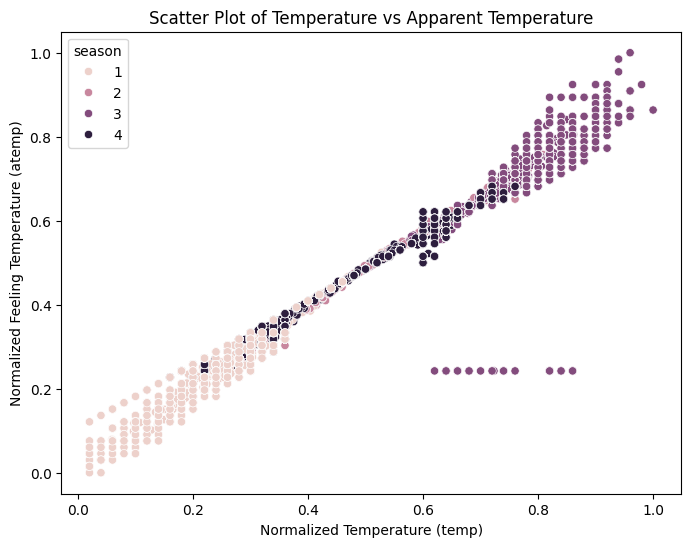

In [31]:
# Scatter plot antara 'temp' dan 'atemp'
cleaned_data = combined
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='atemp', data=cleaned_data, hue='season')
plt.title('Scatter Plot of Temperature vs Apparent Temperature')
plt.xlabel('Normalized Temperature (temp)')
plt.ylabel('Normalized Feeling Temperature (atemp)')
plt.show()

Melihat rata-rata kelembaban

In [32]:
rata_lembap = cleaned_data['hum'].mean()

print(f'Kelembapan rata-rata nya adalah {rata_lembap:.2f}')

Kelembapan rata-rata nya adalah 0.63


# **Visualization & Explanatory Analysis**
Hasil analisis dan visualisasi

### Pertanyaan 1 (Fariq Daffa D. - 10123204):

Bagaimana peminjaman sepeda pada bulan tertentu dipengaruhi oleh musim?

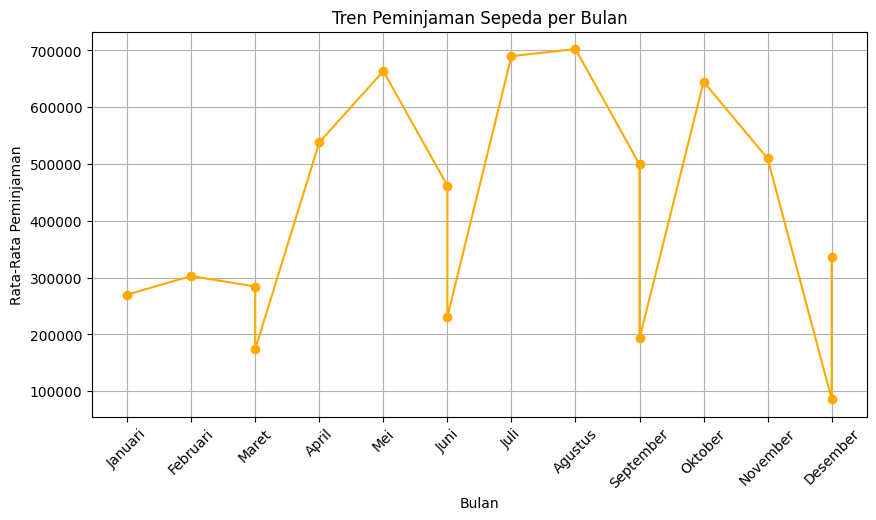


Musim di Portugal:
- Musim Semi (Primavera): Maret hingga Mei
- Musim Panas (Verão): Juni hingga Agustus
- Musim Gugur (Outono): September hingga November
- Musim Dingin (Inverno): Desember hingga Februari


In [33]:
# Dictionary untuk mapping bulan
month = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}

month_order = [
    "Januari", "Februari", "Maret", "April", "Mei", "Juni",
    "Juli", "Agustus", "September", "Oktober", "November", "Desember"
]

# Contoh data simulasi (hapus jika menggunakan data asli)
cleaned_data = pd.DataFrame(combined)

# Mengelompokkan dan menjumlahkan data berdasarkan bulan dan musim
monthly_sn_data = cleaned_data.groupby(['mnth', 'season'])['cnt'].sum().reset_index()
monthly_sn_data["mnth"] = monthly_sn_data["mnth"].map(month)

# Konversi kolom bulan menjadi kategori dengan urutan yang benar
monthly_sn_data["mnth"] = pd.Categorical(monthly_sn_data["mnth"], categories=month_order, ordered=True)

# Urutkan berdasarkan bulan
monthly_sn_data = monthly_sn_data.sort_values(by="mnth")

# Plot menggunakan Matplotlib
plt.figure(figsize=(10, 5))
plt.plot(monthly_sn_data["mnth"], monthly_sn_data["cnt"], marker='o', linestyle='-', color='#ffaa00')
plt.xlabel("Bulan")
plt.ylabel("Rata-Rata Peminjaman")
plt.title("Tren Peminjaman Sepeda per Bulan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Informasi musim di Portugal
musim = [
    "Musim Semi (Primavera): Maret hingga Mei",
    "Musim Panas (Verão): Juni hingga Agustus",
    "Musim Gugur (Outono): September hingga November",
    "Musim Dingin (Inverno): Desember hingga Februari"
]

# Menampilkan informasi musim
def print_season_info():
    print("\nMusim di Portugal:")
    for m in musim:
        print(f"- {m}")

print_season_info()

Peminjaman sepeda cenderung dipengaruhi oleh musim. Terlihat puncak peminjaman terjadi pada bulan-bulan musim panas, seperti Juni, Juli dan Agustus, yang menandakan cuaca cerah mendorong aktivitas luar ruangan. Sebaliknya, jumlah peminjaman menurun drastis pada bulan Desember, yang kemungkinan besar karena kondisi musim dingin yang kurang mendukung aktivitas luar ruangan. Data ini menunjukkan perlunya strategi operasional yang menyesuaikan dengan pola musiman.

### Pertanyaan 2 (Muhamad Dimas Hergi P. - 10123211):

Jam berapa penyewaan sepeda paling tinggi dan rendah?

<ipython-input-34-c2628814e69f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cleaned_data, x="time_category", y="cnt", estimator=sum, palette="coolwarm")


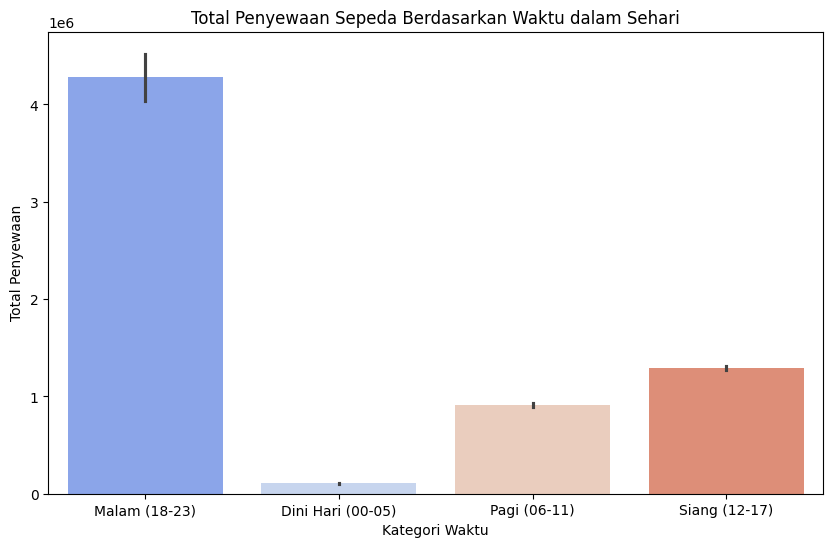

In [34]:
# Buat kategori waktu berdasarkan jam
def categorize_hour(hour):
    if 0 <= hour <= 5:
        return "Dini Hari (00-05)"
    elif 6 <= hour <= 11:
        return "Pagi (06-11)"
    elif 12 <= hour <= 17:
        return "Siang (12-17)"
    else:
        return "Malam (18-23)"

# Menambahkan kolom baru untuk kategori waktu
cleaned_data["time_category"] = cleaned_data["hr"].apply(categorize_hour)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=cleaned_data, x="time_category", y="cnt", estimator=sum, palette="coolwarm")
plt.title("Total Penyewaan Sepeda Berdasarkan Waktu dalam Sehari")
plt.xlabel("Kategori Waktu")
plt.ylabel("Total Penyewaan")
plt.show()

Grafik menunjukkan total penyewaan sepeda berdasarkan waktu dalam sehari. Penyewaan tertinggi terjadi pada malam hari (18:00 - 23:00), sementara dini hari (00:00 - 05:00) memiliki jumlah terendah. Pagi dan siang hari menunjukkan peningkatan, dengan siang hari lebih tinggi. Tren ini mungkin dipengaruhi oleh waktu luang dan kenyamanan cuaca.

<h2>Pertanyaan 3 (Airin Ristiana - 10123194):</h2>

Apakah angin kencang berhubungan dengan penurunan minat orang untuk menyewa sepeda?


Titik-titik lebih padat terletak di area dengan angin kencang,
hal ini bisa menunjukkan bahwa angin di daerah tersebut lebih sering tercatat atau
memiliki kecepatan lebih tinggi. Terlihat pada data bahwa titik-titik terlihat padat
di beberapa Kota. 



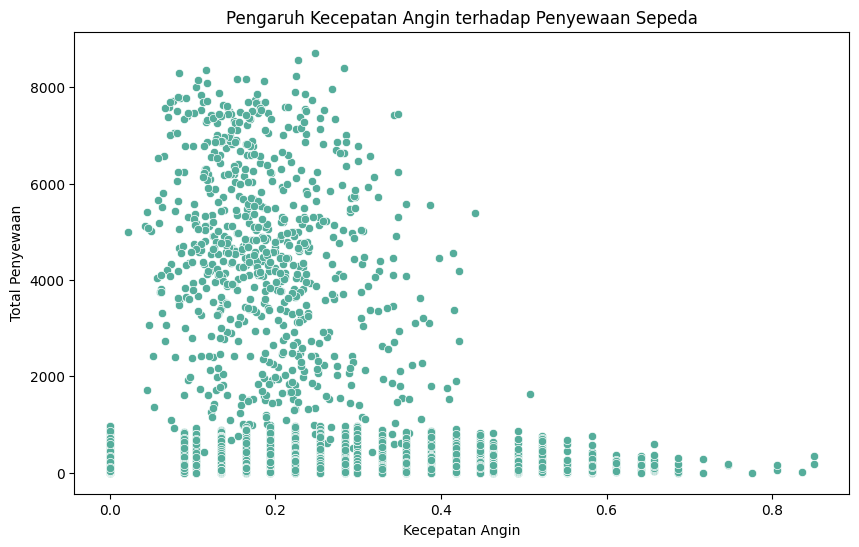


Penyewa cenderung lebih banyak saat windspeed rendah yang artinya saat angin tidak terlalu kencang.


In [35]:
# Simulasi koordinat lokasi di Portugal
np.random.seed(42)
cleaned_data["latitude"] = np.random.uniform(36.96, 42.15, cleaned_data.shape[0])
cleaned_data["longitude"] = np.random.uniform(-9.50, -6.19, cleaned_data.shape[0])

# Peta Heatmap menggunakan Folium
map_center = [cleaned_data["latitude"].mean(), cleaned_data["longitude"].mean()]
m = folium.Map(location=map_center, zoom_start=6)
heat_data = list(zip(cleaned_data["latitude"], cleaned_data["longitude"], cleaned_data["cnt"]))
HeatMap(heat_data).add_to(m)

# Tampilkan peta
display(m)
print("""\nTitik-titik lebih padat terletak di area dengan angin kencang,
hal ini bisa menunjukkan bahwa angin di daerah tersebut lebih sering tercatat atau
memiliki kecepatan lebih tinggi. Terlihat pada data bahwa titik-titik terlihat padat
di beberapa Kota. \n""")

# Scatter plot hubungan windspeed dan penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x="windspeed", y="cnt", color="#55AD9B")
plt.xlabel("Kecepatan Angin")
plt.ylabel("Total Penyewaan")
plt.title("Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda")
plt.show()

print("\nPenyewa cenderung lebih banyak saat windspeed rendah yang artinya saat angin tidak terlalu kencang.")

<h2>Pertanyaan 4 (Fathya Nurulhasanah - 10123190) :</h2>

Apakah ada bulan dengan lonjakan peminjaman yang signifikan?

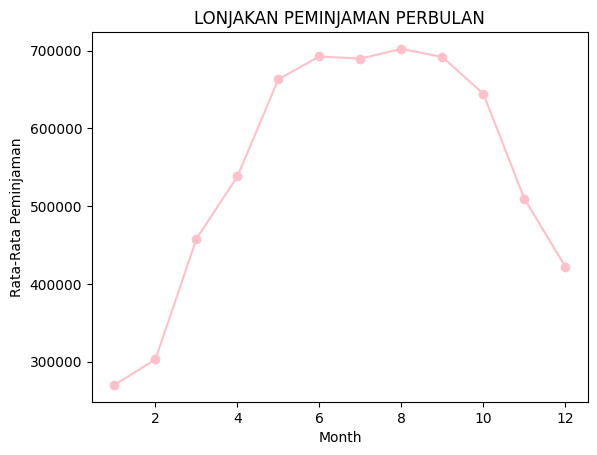

In [36]:
monthly_data = cleaned_data .groupby('mnth')['cnt'].sum().reset_index()

plt.plot(monthly_data['mnth'], monthly_data['cnt'], marker='o', linestyle='-', color='pink', label='Jumlah Peminjaman Sepeda')

plt.title('LONJAKAN PEMINJAMAN PERBULAN')
plt.xlabel('Month')
plt.ylabel('Rata-Rata Peminjaman')
plt.show()

- Januari - Maret : Peminjaman rendah
- April - Juni : Peminjaman meningkat
- Juli : Peminjaman menurun sedikit
- Agustus : Peminjaman meningkat
- September : Peminjaman mulai menurun
- Oktober - Desember : Peminjaman menurun drastis

Dapat disimpulkan bahwa lonjakan peminjaman sepeda meningkat secara signifikan pada rentang bulan April hingga Juni, sementara terjadi penurunan yang signifikan pada rentang bulan Oktober hingga Desember.

<h2>Pertanyaan 5 (Zaqi Satriya - 10123205) :</h2>

Bagaimana pola peminjaman sepeda antara pengguna casual dan registered setiap hari dalam satu minggu?

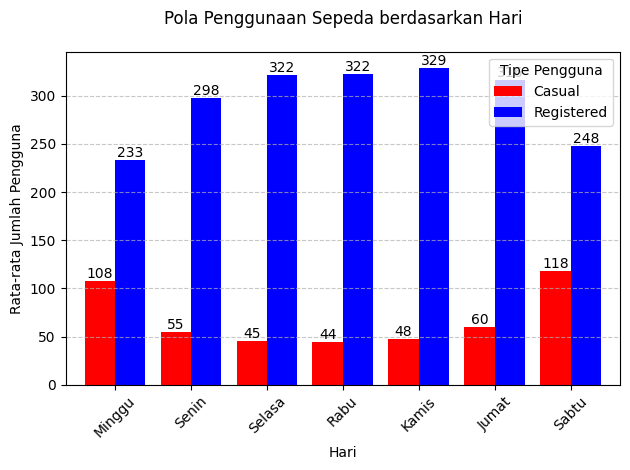

In [37]:
# Mapping untuk nama hari
weekday_map = {
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
}

# Menghitung rata-rata pengguna per hari
weekday_patterns = cleaned_data.groupby('weekday').agg({
    'casual': 'mean',
    'registered': 'mean'
}).round(2)

# Menambahkan nama hari
weekday_patterns.index = weekday_patterns.index.map(weekday_map)

# Membuat bar plot
weekday_patterns.plot(kind='bar', width=0.8, color=['red', 'blue'])

plt.title('Pola Penggunaan Sepeda berdasarkan Hari', pad=20)
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.legend(['Casual', 'Registered'], title='Tipe Pengguna')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Menambahkan nilai di atas bar
for i in range(len(weekday_patterns)):
    for j, col in enumerate(weekday_patterns.columns):
        plt.text(i + (j-0.5)*0.4, weekday_patterns.iloc[i][col],
                f'{weekday_patterns.iloc[i][col]:.0f}',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

Pola penggunaan harian menunjukkan bahwa pengguna registered cenderung stabil sepanjang minggu, sementara pengguna casual meningkat signifikan pada akhir pekan, terutama pada hari Minggu. Perusahaan dapat memanfaatkan peningkatan pengguna casual pada akhir pekan dengan menawarkan diskon khusus atau event promosi.

<h2>Pertanyaan 6 (Mohamad Zaki Zakiran - 10123206):</h2>

Bagaimana pola penggunaan sepeda dikelompokkan berdasarkan faktor suhu dan kelembaban?


Karakteristik tiap klaster:
- Cluster 0  : Suhu hangat dan kelembaban sedang.
- Cluster 1  : Suhu moderat dengan kelembaban bervariasi.
- Cluster 2  : Suhu rendah dan kelembaban tinggi.



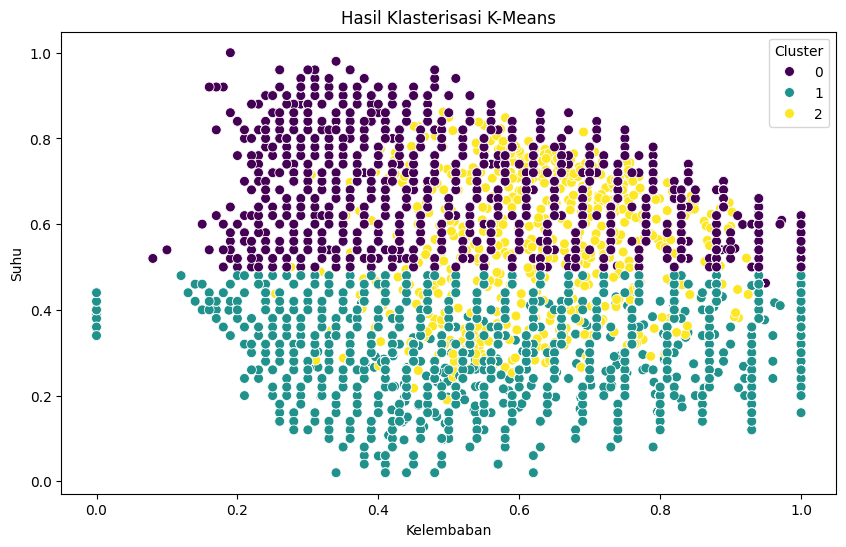


Distribusi Data dalam Setiap Klaster:


,Cluster,Jumlah Data
0,0,9060
1,1,8476
2,2,574



Cluster 0: Pengguna dengan pola penggunaan tinggi, sering terjadi saat suhu hangat dan kelembaban sedang.
Cluster 1: Pengguna dengan pola penggunaan sedang, ditemukan saat suhu moderat dengan kelembaban bervariasi.
Cluster 2: Pengguna dengan pola penggunaan rendah, cenderung muncul saat suhu rendah dan kelembaban tinggi.


In [38]:
# Normalisasi data
scaler = StandardScaler()
day_scaled_env = scaler.fit_transform(cleaned_data[['hum', 'temp', 'cnt']])

# K-Means clustering
kmeans_env = KMeans(n_clusters=3, random_state=42)
cleaned_data['cluster_env'] = kmeans_env.fit_predict(day_scaled_env)

print("\nKarakteristik tiap klaster:")
print("- Cluster 0  : Suhu hangat dan kelembaban sedang.")
print("- Cluster 1  : Suhu moderat dengan kelembaban bervariasi.")
print("- Cluster 2  : Suhu rendah dan kelembaban tinggi.\n")

# Visualisasi hasil klasterisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=cleaned_data['hum'],
    y=cleaned_data['temp'],
    hue=cleaned_data['cluster_env'],
    palette='viridis',
    s=50
)
plt.xlabel('Kelembaban')
plt.ylabel('Suhu')
plt.title('Hasil Klasterisasi K-Means')
plt.legend(title='Cluster')
plt.show()

# Menampilkan jumlah data dalam setiap klaster
cluster_counts_env = cleaned_data['cluster_env'].value_counts().reset_index()
cluster_counts_env.columns = ['Cluster', 'Jumlah Data']
print("\nDistribusi Data dalam Setiap Klaster:")
df_env = pd.DataFrame(cluster_counts_env)
display(df_env)

print("\nCluster 0: Pengguna dengan pola penggunaan tinggi, sering terjadi saat suhu hangat dan kelembaban sedang.")
print("Cluster 1: Pengguna dengan pola penggunaan sedang, ditemukan saat suhu moderat dengan kelembaban bervariasi.")
print("Cluster 2: Pengguna dengan pola penggunaan rendah, cenderung muncul saat suhu rendah dan kelembaban tinggi.")

Klasterisasi ini menunjukkan bahwa suhu dan kelembaban mempengaruhi pola penggunaan sepeda. Saat suhu lebih hangat dengan kelembaban sedang, jumlah pengguna cenderung meningkat, sedangkan suhu rendah dengan kelembaban tinggi mengurangi penggunaan sepeda.